# Tensors
Tensors are a specialized data structure, similar to arrays and matrices. Tensors can be used to encode inputs and outputs of a model, as well as the model's parameters.
Tensors are similar to NumPy's ndarrays, except that tensors can run on GPUs or other hardware accelerators. Tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data.

In [5]:
import torch
import numpy as np

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
# a change in the tensor reflects in the NumPy array
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")
# NumPy array can generate a tensor
m = np.ones(5)
u = torch.from_numpy(m)
print(f"m: {m}")
print(f"u: {u}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]
m: [1. 1. 1. 1. 1.]
u: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## Initializing a Tensor

In [5]:
import torch
import numpy as np

# directly from data
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
# from a numpy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
# from another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor; \n {x_ones} \n")
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")
# with random or constant values
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Ones Tensor; 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9909, 0.8039],
        [0.2714, 0.6522]]) 

Random Tensor: 
 tensor([[0.8646, 0.9171, 0.5131],
        [0.6682, 0.2453, 0.0314]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Attributes of a Tensor

In [6]:
import torch
import numpy as np

tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operations on Tensors
The [torch package](https://pytorch.org/docs/stable/torch.html) contains over 100 operations. By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using 
`.to` 
method (after checking for GPU availability). 

In [2]:
import torch

if torch.cuda.is_available():
    tensor = tensor.to("cuda")

### Indexing and Slicing 

In [4]:
import torch
tensor = torch.ones(4,4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:, 1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Joining Tensors
`torch.cat` concatenates tensors along a given dismension. [`torch.stack`](https://pytorch.org/docs/stable/generated/torch.stack.html) concatenates a sequence of tensors along a new dismension.

In [5]:
import torch

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Arithmetic Operations

In [16]:
import torch

# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
print(y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print(z3)

# If you have a one-element tensor, you can convert it to a Pytnon numerical value
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
12.0 <class 'float'>


# Datasets and Downloaders
Code for processing data samples can get messy and hard to maintain. Ideally, we want our dataset code to be separate from our model training code for better readability and modularity. PyTorch provides two data primitives that allow you to use pre-loaded datasets as well as your own data: 
`torch.utils.data.Dataloader`
and 
`torch.utils.data.Dataset`
.
`Dataset` 
stores the samples and their corresponding labels, and 
`DataLoader`
wraps an iterable around the 
`Dataset`
to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets that subclass
`torch.utils.data.Dataset`
and implement functions specific to the particular data, for use prototyping and behcnmarking your model. 
* [Image Datasets](https://pytorch.org/vision/stable/datasets.html)
* [Text Datasets](https://pytorch.org/text/stable/datasets.html)
* [Audio Datasets](https://pytorch.org/audio/stable/datasets.html)

## Loading a Dataset
Here is an example presented with the [Fashion MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/)
dataset. The dataset consists of 60,000 training examples and 10,000 test examples. Each example comprises a 28x28 grayscale image and an associated label from one of 10 classes.
We load the dataset with the following parameters:
* `root` is the path where the train/test data is stored
* `train` specifies training or test dataset
* `download=True`downloads the data from the internet if it's not available at `root`
* `transform` and `target_transform` specify the feature and label transformations.

In [17]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



## Iterating and Visualizing the Dataset
We can index `Datasets` manually like a list:
`training_data[index]`
. We can use
`matplotlib`
to visualize some samples in our training data.

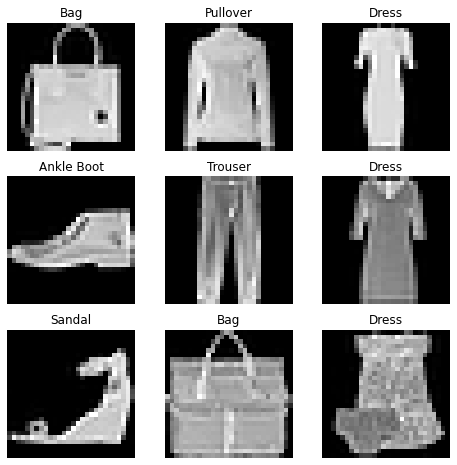

In [18]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

## Creating a Custom Dataset
A custom Dataset class must implement three functions: 
* `__init__`
* `__len__`
* `__getitem__`


In the following implementation, the FashionMNIST images are stored in a directory `img_dir` and their labels are stored separately in a CSV file `annotations_file`.

### `__init__`
This function is ran once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms.

The `labels.csv` file looks like:

```
tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9
```

```py
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
```

### `__len__`
This function returns the number of samples in our dataset:

```py
def __len__(self):
    return len(self.img_labels)
```

### `__getitem__`
This function loads and returns a sample from the dataset at the given index `idx`. Based on the index, it identifies the image's location on disk, converts that to a tensor using `read_image`, retrieves the corresponding label from the dsv data in `self.img_labels`, calls the transform functions if applicable, and returns the tensor image and corresponding label in a tuple.

```py
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label
```

In [19]:
import torch
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    def __len__(self):
        return len(self.img_labels)
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels, iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Preparing Data for Training with DataLoaders
The `Dataset` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's multiprocessing to speed up data retrieval. 

`DataLoader` is an iterable that abstracts this complexity for us in an easy [API](https://pytorch.org/docs/stable/data.html).

In [20]:
import torch
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through DataLoader
After loading the dataset into DataLoader, we can iterate through the dataset as needed. Each iteration below returns a batch of `train_features` and `train_labels` (containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled. (For finder control over data loading order, reference [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler))

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


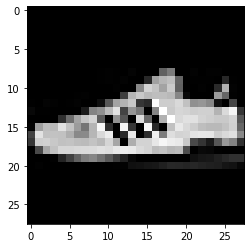

Label: 7


In [25]:
import torch
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# display image and label
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Sources
* https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html
* https://pytorch.org/tutorials/beginner/basics/data_tutorial.html